On importe les librairies nécessaires

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

On configure seaborn:

In [2]:
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

On charge les données :

In [3]:
data = pd.read_csv("olympics.csv", sep="\t")

1er graphe: Top 15 des pays par nombre total de médailles olympiques (1896-2008)

C:\Users\josue-daniel.baquero\AppData\Local\Temp\ipykernel_24072\2726561447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_country.values, y=medals_by_country.index,


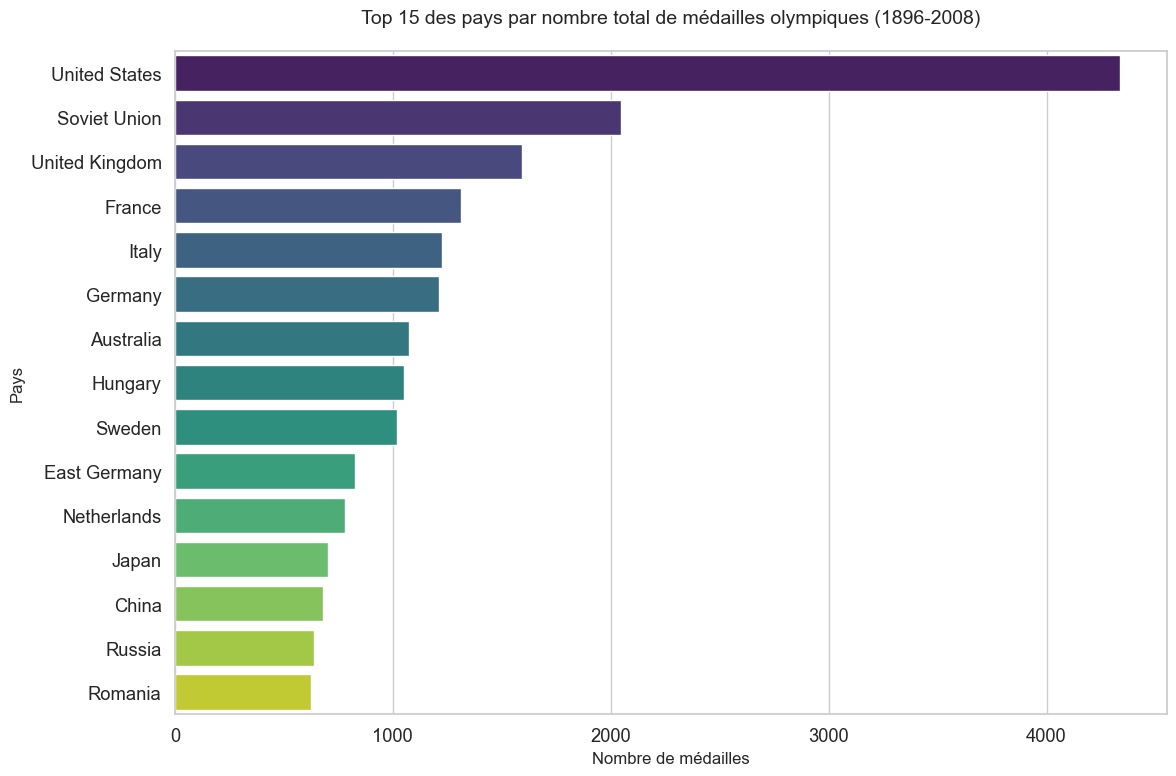

In [4]:

plt.figure(figsize=(12, 8))
medals_by_country = data['Country'].value_counts().head(15)
sns.barplot(x=medals_by_country.values, y=medals_by_country.index, 
            palette='viridis')
plt.title('Top 15 des pays par nombre total de médailles olympiques (1896-2008)', 
          pad=20, fontsize=14)
plt.xlabel('Nombre de médailles', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.tight_layout()
plt.savefig('medals_by_country.png', dpi=300, bbox_inches='tight') #on sauvegarde avant d'afficher
plt.show()
plt.close()

Type de graphe choisi: Graphique en barres horizontales
- Les barres horizontales facilitent la lecture des noms de pays (pas besoin de les incliner)
- La gradation des couleurs aide à différencier les rangs

Résultats: 
- On remarque la domination des États-Unis et de l'Union Soviétique

2ème graphe: Distribution des médailles par genre aux JO (1896-2008)

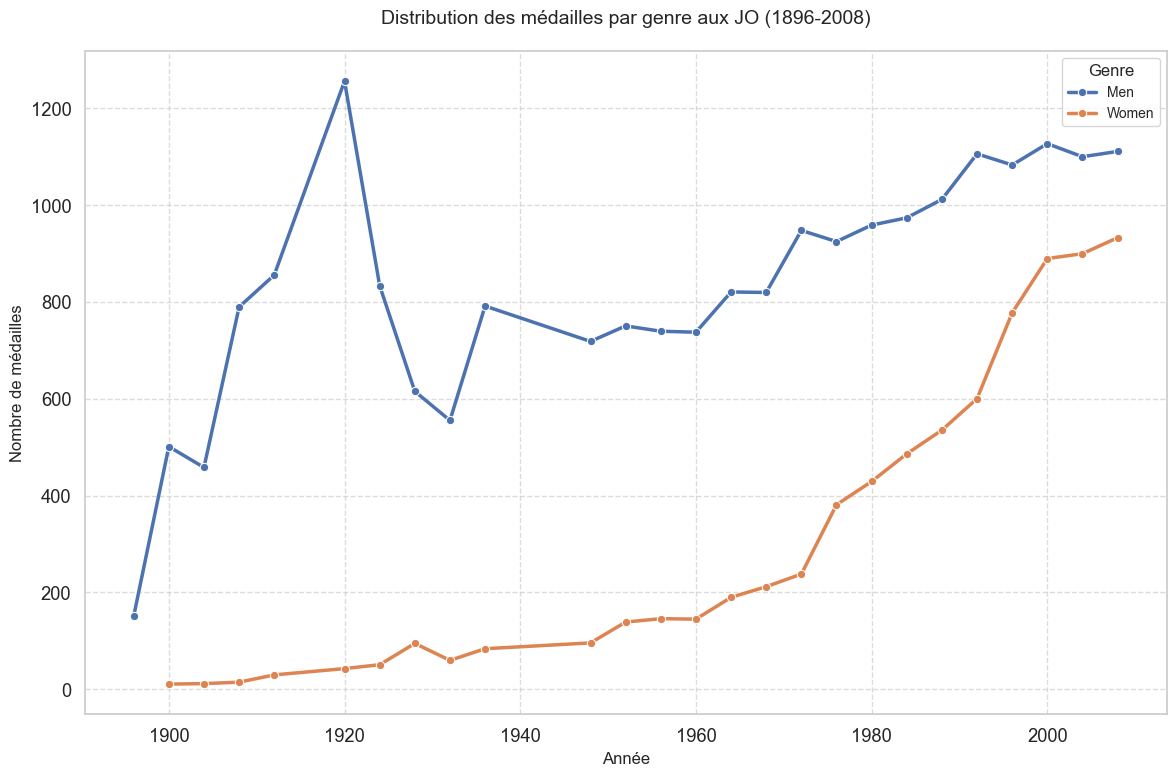

In [5]:
plt.figure(figsize=(12, 8))
gender_year_data = data.groupby(['Year', 'Gender']).size().reset_index(name='count')
sns.lineplot(data=gender_year_data, x='Year', y='count', hue='Gender', 
             marker='o', linewidth=2.5)
plt.title('Distribution des médailles par genre aux JO (1896-2008)', 
          pad=20, fontsize=14)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de médailles', fontsize=12)
plt.legend(title='Genre', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('gender_evolution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Type de graphe choisi: Graphique en ligne
- Permet de créer une continuité dans l'évolution temporelle afin de voir les tendances
- Le choix des couleurs permet de bien distinguer les deux courbes

Résultats: 
- On observe la domination historique des hommes aux JO, mais aussi la progression constante des femmes surtout après 1960
- On observe des pics et des creux probablement dus aux guerres mondiales


3ème graphe: Évolution des médailles par décennie

C:\Users\josue-daniel.baquero\AppData\Local\Temp\ipykernel_24072\3253531495.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_medals.index, y=decade_medals.values,


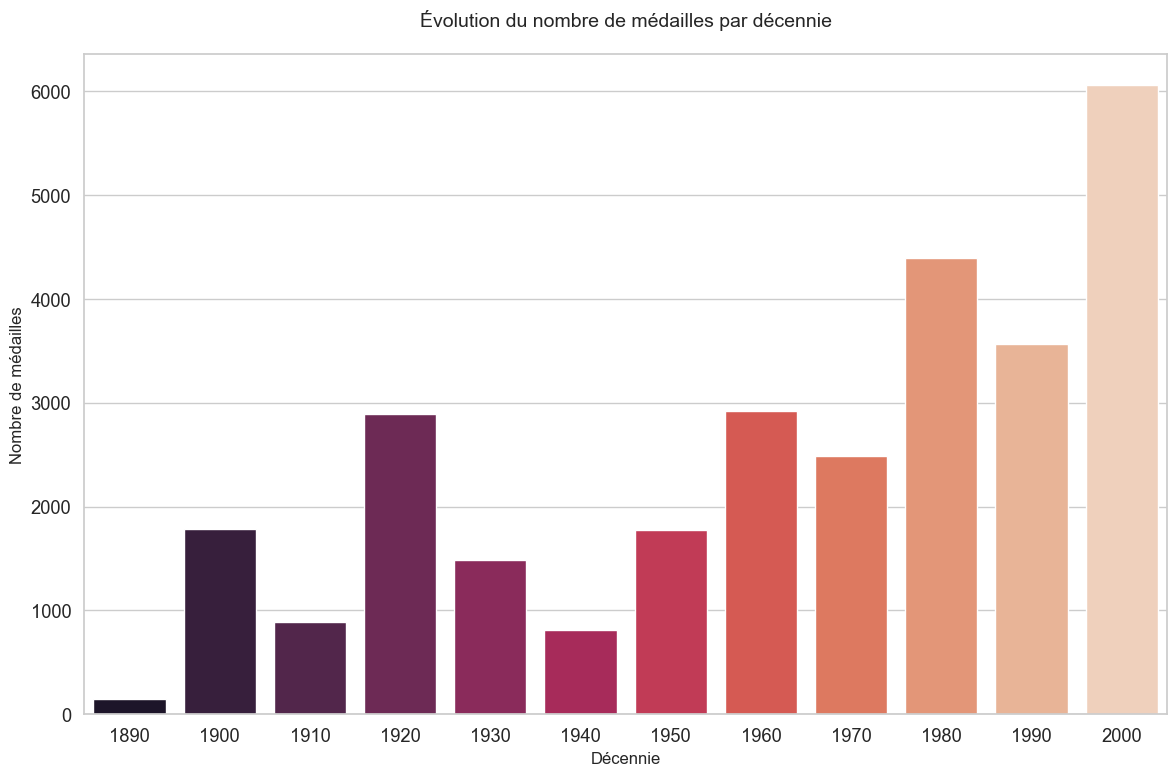

In [6]:
plt.figure(figsize=(12, 8))
data['Decade'] = (data['Year'] // 10) * 10
decade_medals = data.groupby('Decade')['Medal'].count()
sns.barplot(x=decade_medals.index, y=decade_medals.values, 
            palette=sns.color_palette("rocket", len(decade_medals)))
plt.title('Évolution du nombre de médailles par décennie', 
          pad=20, fontsize=14)
plt.xlabel('Décennie', fontsize=12)
plt.ylabel('Nombre de médailles', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('medals_by_decade.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Type de graphe choisi: Graphique en barres verticales
- Permettent de montrer une progression temporelle
- La palette de couleurs en dégradé aide à visualiser la progression chronologique

Résultats:
- On voit clairement l'augmentation globale du nombre de médailles au fil du temps
- Les variations sont bien visibles (baisse durant les guerres mondiales, forte augmentation après 1980)